# Oasis Infobyte (Data Science Internship)
## Task 3
## Car Price Prediction
### By Saugata Panja

## 1. Loading dataset

In [209]:
# importing pandas to read the dataset
import pandas as pd
#Reading the Iris dataset through pandas
data=pd.read_csv("car data.csv")
df=pd.DataFrame(data)

#Printing the dataset
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## 2. Dataset analysis and Cleaning

In [210]:
# Checking shape of dataset
df.shape


(301, 9)

In [211]:
# Printing coulums' name
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [212]:
# Description of the dataset
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [213]:
# Info about the whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [214]:
# Checking for null values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [215]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

True
    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
17    ertiga  2016           7.75          10.79       43000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Selling_type Transmission  Owner  
17       Dealer       Manual      0  
93       Dealer    Automatic      0  


In [216]:
#Removing duplicate rows
df=df[~dups]
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [217]:
#Checking whether duplicate rows were removed or not
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any()) 

False


In [218]:
df["Owner"].unique()

array([0, 1, 3], dtype=int64)

In [219]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

## 3. Encoding
Car_Name, Fuel_Type, Selling_type, Transmission are categorical variable. We need turn those variables in numerical.

In [220]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
# Fit and transform the categorical feature
le=LabelEncoder()
df['Car_Name'] = le.fit_transform(df['Car_Name'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


## 3. Data Visualization

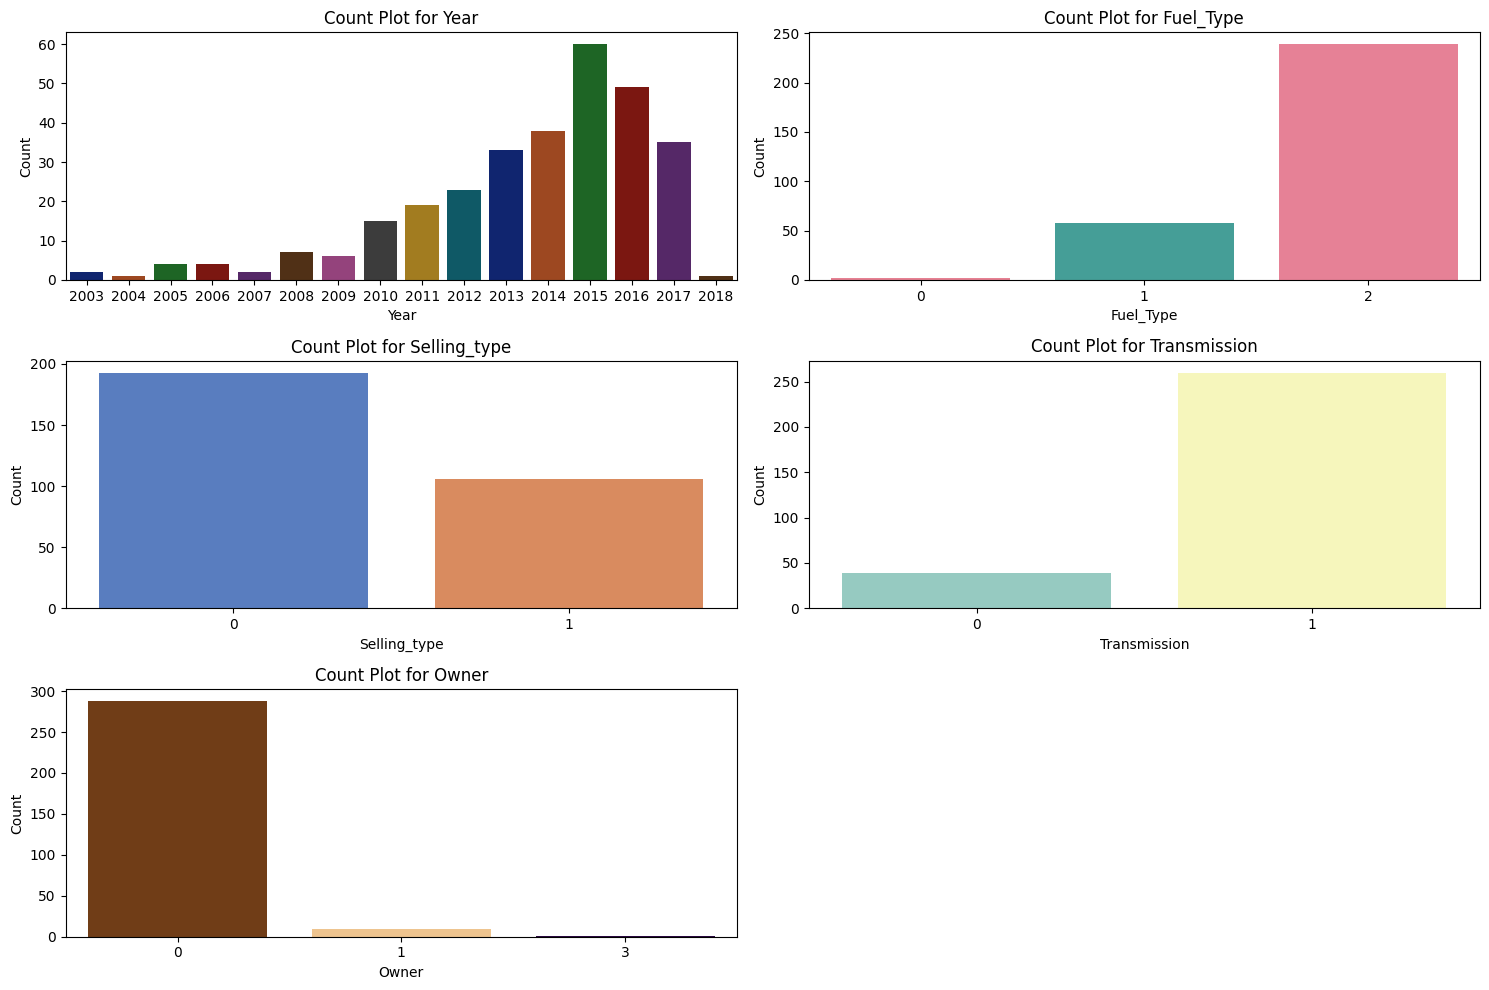

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with a specified size
plt.figure(figsize=(15, 10))

# Create the first subplot
plt.subplot(3, 2, 1)
sns.countplot(x='Year', data=df, palette='dark', linewidth=5, hue='Year', legend=False)
plt.title('Count Plot for Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Create the second subplot
plt.subplot(3, 2, 2)
sns.countplot(x='Fuel_Type', data=df, palette='husl', linewidth=5, hue='Fuel_Type', legend=False)
plt.title('Count Plot for Fuel_Type')
plt.xlabel('Fuel_Type')
plt.ylabel('Count')

# Create the third subplot
plt.subplot(3, 2, 3)
sns.countplot(x='Selling_type', data=df, palette='muted', linewidth=5, hue='Selling_type', legend=False)
plt.title('Count Plot for Selling_type')
plt.xlabel('Selling_type')
plt.ylabel('Count')

# Create the fourth subplot
plt.subplot(3, 2, 4)
sns.countplot(x='Transmission', data=df, palette='Set3', linewidth=5, hue='Transmission', legend=False)
plt.title('Count Plot for Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')

# Create the fifth subplot
plt.subplot(3, 2, 5)
sns.countplot(x='Owner', data=df, palette='PuOr', linewidth=5, hue='Owner', legend=False)
plt.title('Count Plot for Owner')
plt.xlabel('Owner')
plt.ylabel('Count')

# Show all subplots in a single figure
plt.tight_layout()
plt.show()

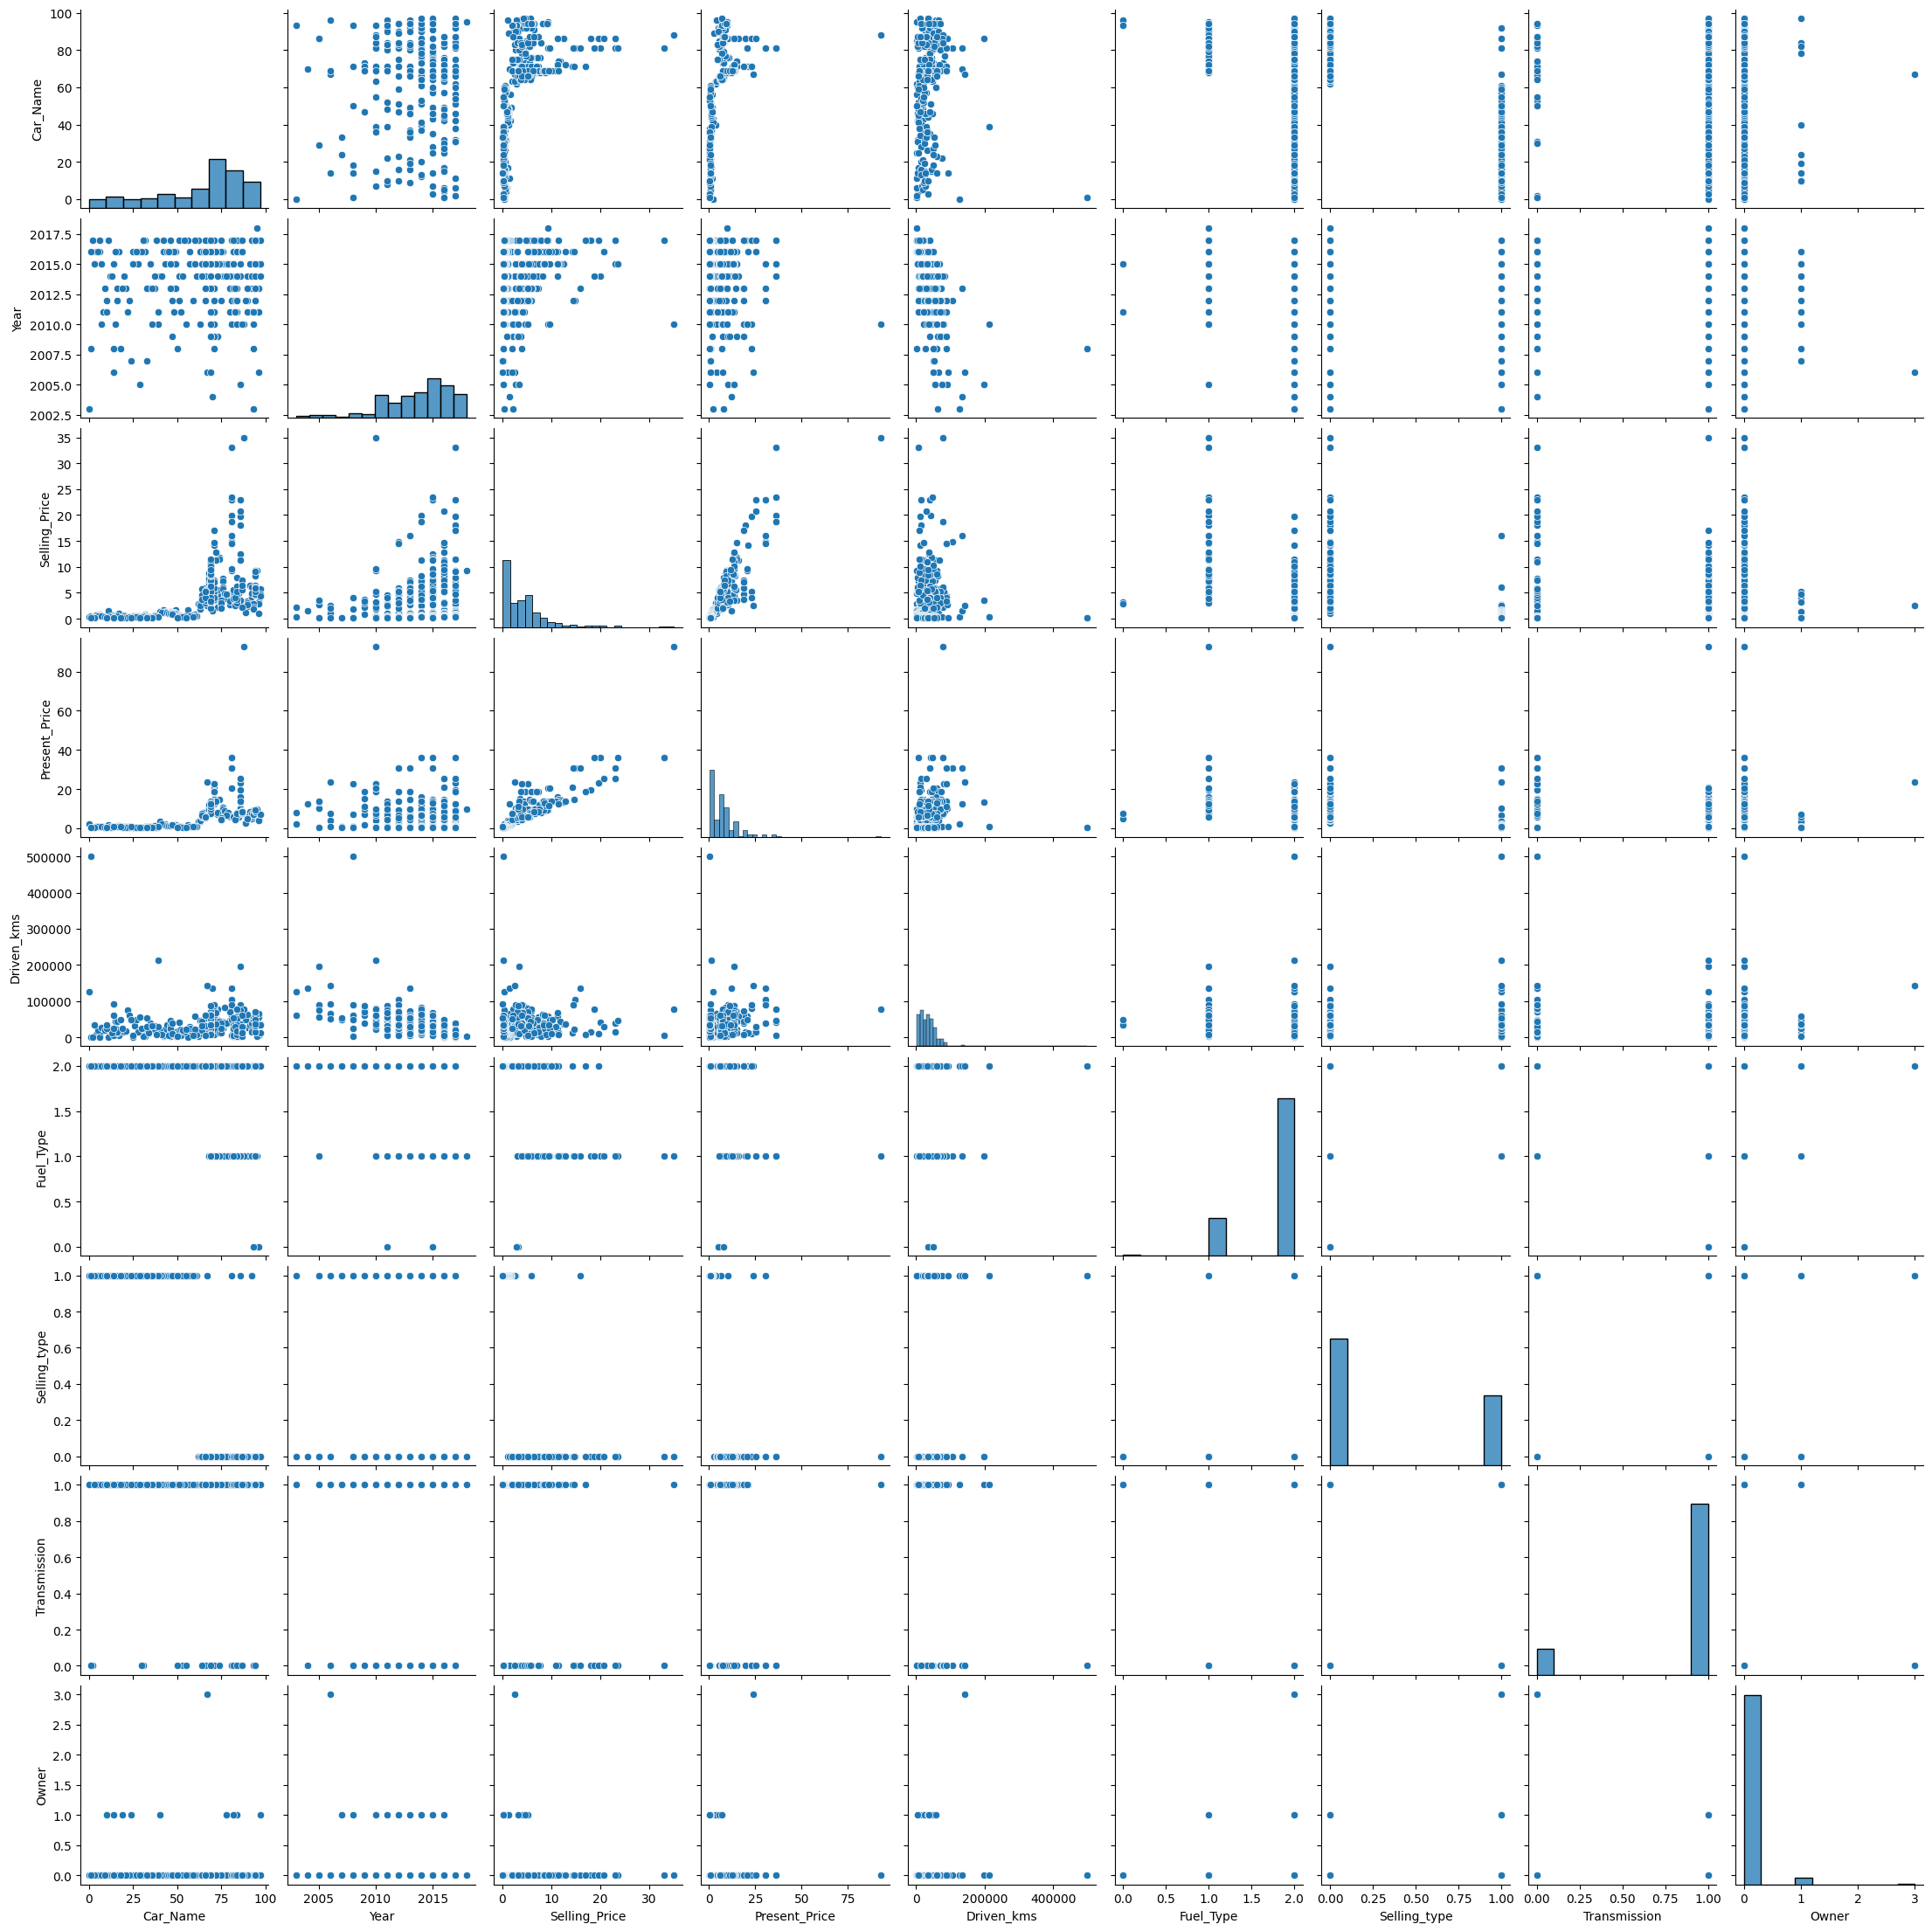

In [222]:
sns.pairplot(df)

<Axes: >

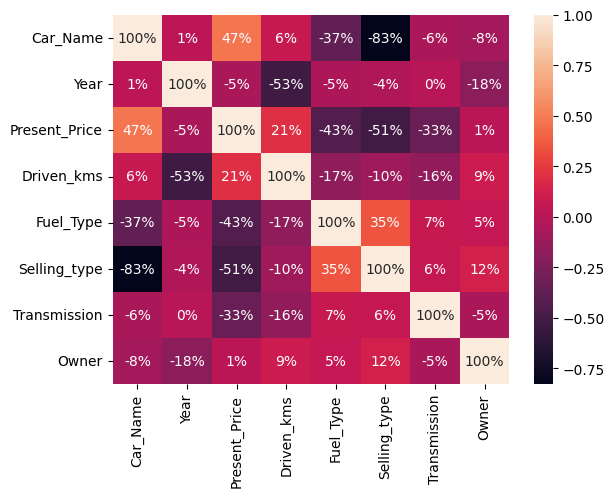

In [223]:
data=df.drop(['Selling_Price'], axis=1)
sns.heatmap(data.corr(),annot=True,fmt='.0%')

Checking for outliers using Box Plot

<Axes: >

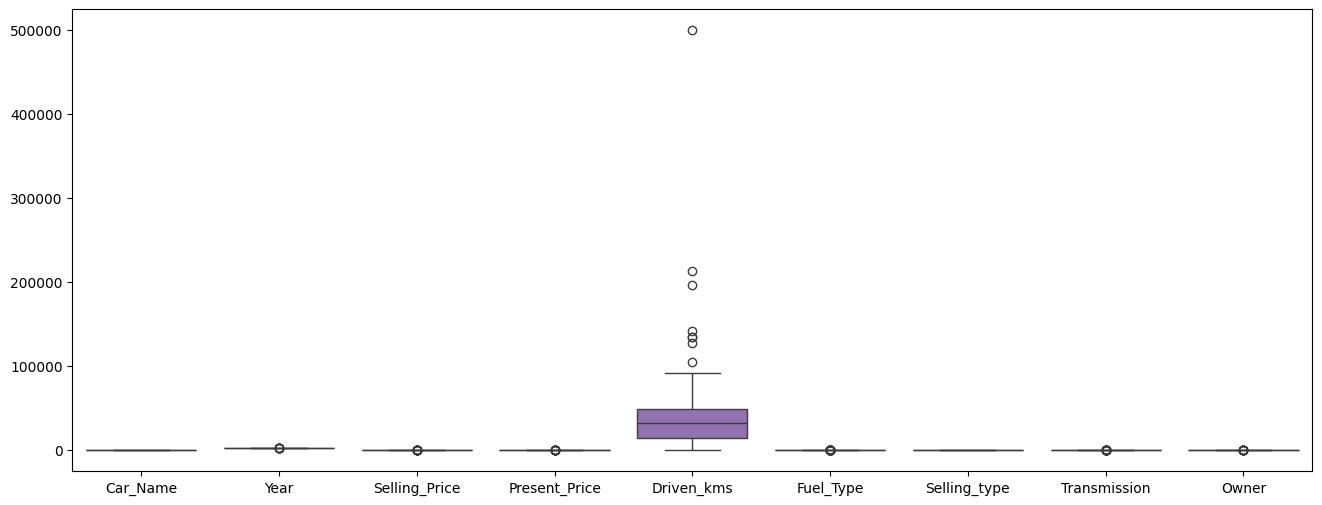

In [224]:
# Set the figure size
plt.figure(figsize=(16, 6))

# Create a boxplot for the entire DataFrame
sns.boxplot(data=df)

Removing outliers using Z-score method.

In [225]:
# Removing outliers
from scipy import stats
z_scores = stats.zscore(df['Driven_kms'])
threshold = 2  
# We can adjust this threshold as needed

outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove the outliers from the dataset
df= df[~outliers]
print(df)

     Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0          90  2014           3.35           5.59       27000          2   
1          93  2013           4.75           9.54       43000          1   
2          68  2017           7.25           9.85        6900          2   
3          96  2011           2.85           4.15        5200          2   
4          92  2014           4.60           6.87       42450          1   
..        ...   ...            ...            ...         ...        ...   
296        69  2016           9.50          11.60       33988          1   
297        66  2015           4.00           5.90       60000          2   
298        69  2009           3.35          11.00       87934          2   
299        69  2017          11.50          12.50        9000          1   
300        66  2016           5.30           5.90        5464          2   

     Selling_type  Transmission  Owner  
0               0             1      0  
1    

<Axes: >

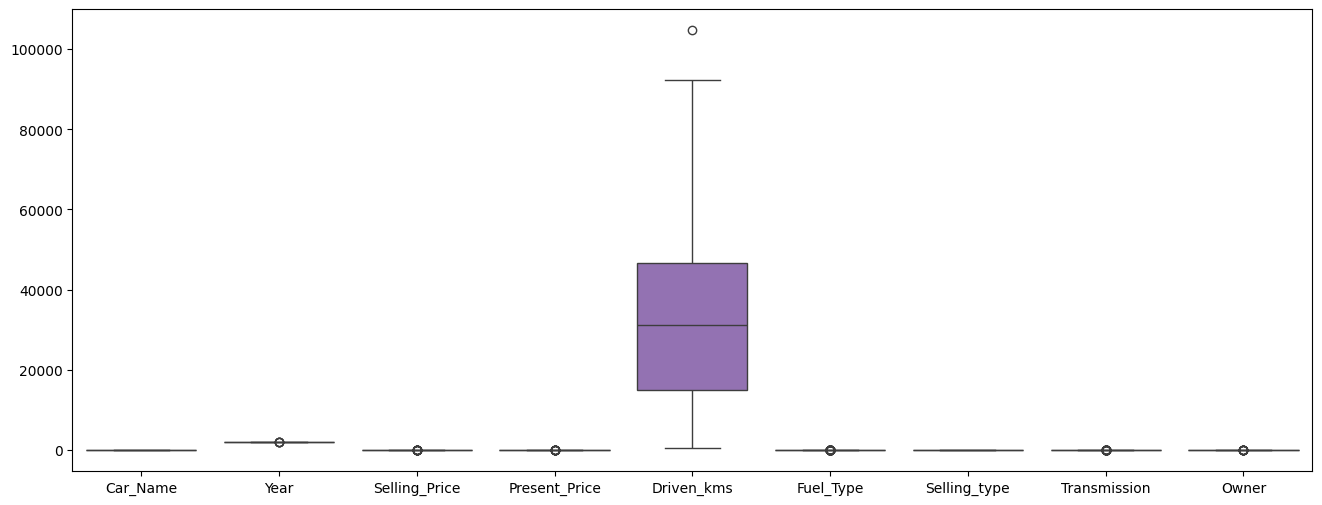

In [226]:
# Verifying whether outliers were removed or not
plt.figure(figsize=(16, 6))

# Create a boxplot for the entire DataFrame
sns.boxplot(data=df)

In [227]:
df.shape

(292, 9)

## 5. Splitting dataset into trainng set and testing set

In [228]:
X= df.drop(["Selling_Price"], axis=1)
y= df["Selling_Price"]
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [229]:
X

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1,0,1,0
297,66,2015,5.90,60000,2,0,1,0
298,69,2009,11.00,87934,2,0,1,0
299,69,2017,12.50,9000,1,0,1,0


In [230]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 292, dtype: float64

## 6. Trainning Different ML models

In [231]:
# Importing required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [232]:
# Train and evaluate a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_rmse = mean_squared_error(y_test, lr.predict(X_test), squared=False)
print(f'Linear Regression RMSE: {lr_rmse:.4f}')

#Train and evaluate a Lasso regression model
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_rmse = mean_squared_error(y_test, lasso.predict(X_test), squared=False)
print(f'Lasso Regression RMSE: {lasso_rmse:.4f}')

# Train and evaluate a Ridge regression model
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_rmse = mean_squared_error(y_test, ridge.predict(X_test), squared=False)
print(f'Ridge Regression RMSE: {ridge_rmse:.4f}')

# Train and evaluate an ElasticNet regression model
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
elasticnet_rmse = mean_squared_error(y_test, elasticnet.predict(X_test), squared=False)
print(f'ElasticNet Regression RMSE: {elasticnet_rmse:.4f}')

# Train and evaluate a decision tree regression model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_rmse = mean_squared_error(y_test, dt.predict(X_test), squared=False)
print(f'Decision Tree Regression RMSE: {dt_rmse:.4f}')

# Train and evaluate a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
print(f'Random Forest Regression RMSE: {rf_rmse:.4f}')

# Train and evaluate a gradient boosting regression model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
gb_rmse = mean_squared_error(y_test, gb.predict(X_test), squared=False)
print(f'Gradient Boosting Regression RMSE: {gb_rmse:.4f}')

# Train and evaluate a support vector regression model
svm = SVR()
svm.fit(X_train, y_train)
svm_rmse = mean_squared_error(y_test, svm.predict(X_test), squared=False)
print(f'Support Vector Regression RMSE: {svm_rmse:.4f}')

# Train and evaluate a k-nearest neighbors regression model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_rmse = mean_squared_error(y_test, knn.predict(X_test), squared=False)
print(f'k-Nearest Neighbors Regression RMSE: {knn_rmse:.4f}')

Linear Regression RMSE: 1.6061
Lasso Regression RMSE: 1.7057
Ridge Regression RMSE: 1.6025
ElasticNet Regression RMSE: 1.6865
Decision Tree Regression RMSE: 0.7056
Random Forest Regression RMSE: 0.7212
Gradient Boosting Regression RMSE: 0.6092
Support Vector Regression RMSE: 3.8246
k-Nearest Neighbors Regression RMSE: 4.4305


So here, We can see Gradient Boosting regressor has the least error means the highest accuracy of all.

In [233]:
y_pred=gb.predict(X_test)
y_pred

array([ 4.74719667,  0.62481979,  0.97461535,  7.28198544,  8.90427532,
        1.17437356,  0.67937737,  5.52050907,  0.52681272, -0.05014572,
        5.34333913,  6.80527056,  4.10697358,  3.81003716,  0.04467577,
        4.86670458,  2.65665034,  5.61987774,  6.67630143,  2.19634117,
       11.74498272,  2.75062029,  0.263171  ,  4.5351395 , 15.82301998,
        0.27845812,  2.49145735,  4.72886754,  5.62052585,  0.49579191,
        6.06382231,  0.18214043,  0.56607896,  0.52204714,  0.85477264,
        2.33803704,  4.72886754,  8.77202692,  7.21880607,  0.75484315,
        4.20332866,  0.36886989,  1.31518291,  0.75484315,  0.50665254,
        0.55643839,  0.31053383,  4.29135738,  4.5362793 ,  0.69037511,
        2.6787406 ,  5.55363783,  5.07837731,  5.50218658,  1.025235  ,
        7.1573868 , 23.05763734,  2.6712473 ,  4.33554387])